In [1]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# matplotlib plotting parameters
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'
mpl.rcParams['figure.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'

In [2]:
def plot_correlation_functions( time, corrfuncs, mean, title ):
    fig = plt.figure()
    plt.title(title)
    plt.xlabel(r'time, s')
    plt.ylabel(r'Correlation function')
    plt.xlim((0.0, 1.5e-13))
    
    for corrfunc in corrfuncs:
        plt.plot(time, corrfunc, color = '0.6', lw = 2.0)
    
    plt.plot(time, mean, 'r', lw = 2.0)
    plt.grid(linestyle = ':', alpha = 0.7)

In [3]:
def chunker(seq, size):
    return (tuple(seq[pos:pos+size]) for pos in xrange(0, len(seq), size))        
        
def mean( group ):
    return np.mean(group, axis = 0)
        
def group_by( lists, size ):
    res = []
   
    for group in chunker(range(len(lists)), size):
        res.append( mean([lists[g] for g in group]) )
    
    return res

In [4]:
from os import listdir
from os.path import isfile, join

path = './blocksNEW/'
files = [join(path, f) for f in listdir(path) if isfile(join(path, f))]
files = [f for f in files if 'mean' not in f]

times = []
corrfunc_blocks = []
for f in files:
    #print('f: {0}'.format(f))
    data = np.loadtxt(f, delimiter = " ")
    times.append(data[:, 0])
    corrfunc_blocks.append(data[:, 1])

<IPython.core.display.Javascript object>


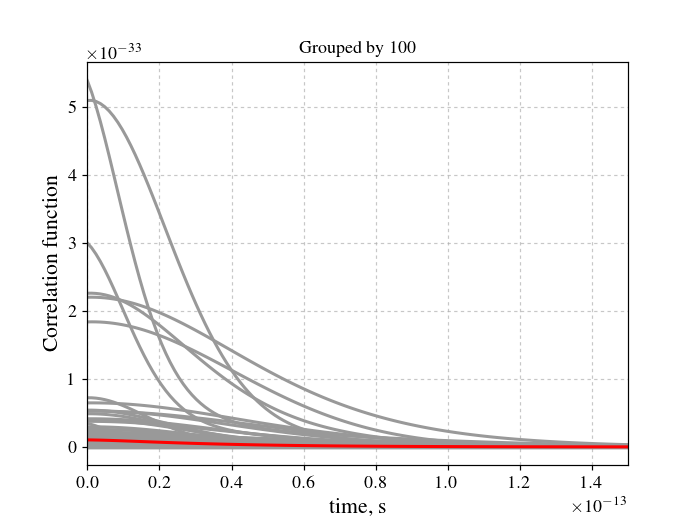

In [5]:
mean_corr_func = group_by( corrfunc_blocks, len(corrfunc_blocks) )[0]
plot_correlation_functions( times[0], corrfunc_blocks, mean_corr_func, "Grouped by 100" )

<IPython.core.display.Javascript object>


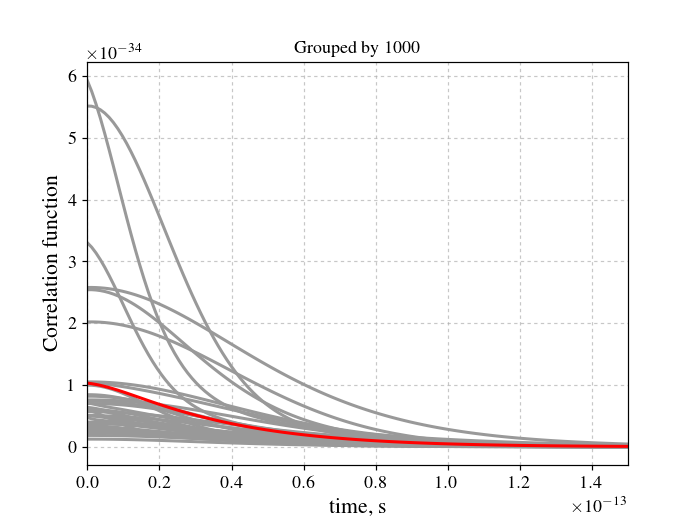

In [6]:
corrfunc_by_400 = group_by( corrfunc_blocks, 10 )
plot_correlation_functions( times[0], corrfunc_by_400, mean_corr_func, "Grouped by 1000" )

<IPython.core.display.Javascript object>


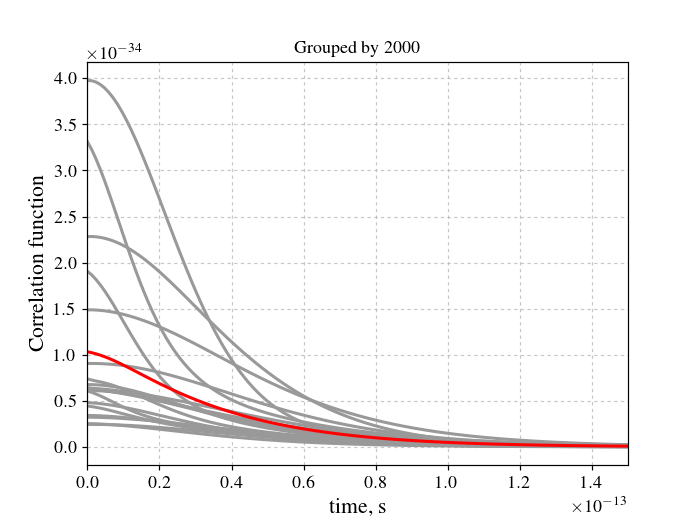

In [7]:
corrfunc_by_1000 = group_by( corrfunc_blocks, 20 )
plot_correlation_functions( times[0], corrfunc_by_1000, mean_corr_func, "Grouped by 2000" )

<IPython.core.display.Javascript object>


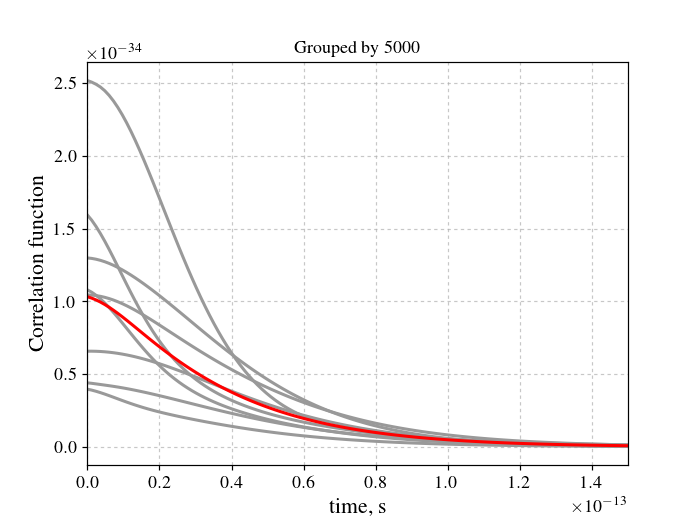

In [8]:
corrfunc_by_2000 = group_by( corrfunc_blocks, 50 )
plot_correlation_functions( times[0], corrfunc_by_2000, mean_corr_func, "Grouped by 5000" )

In [9]:
# сохраняем среднее значение
#t = np.concatenate( (-times[0][::-1], times[0]), axis = 0 )
#m = np.concatenate( (mean_corr_func[::-1], mean_corr_func), axis = 0 )
#data = np.vstack((t, m))
#np.savetxt("./blocksNEW/mean.txt",  np.transpose(data))

<IPython.core.display.Javascript object>


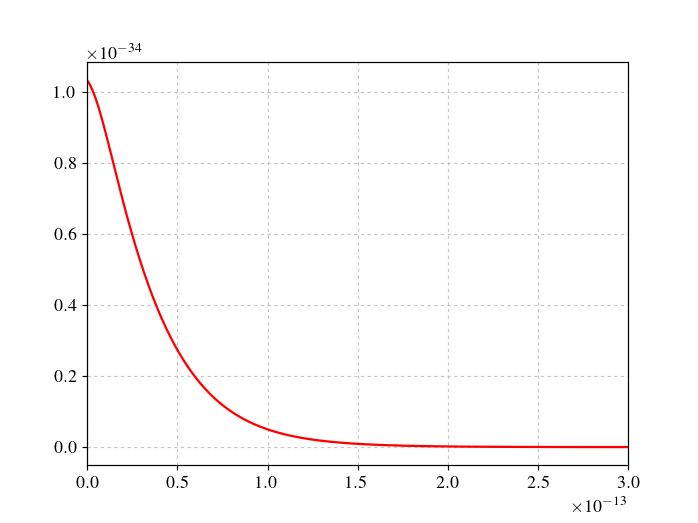

In [10]:
fig = plt.figure()
plt.plot(times[0], mean_corr_func, color = 'r')
plt.xlim((0.0, 3e-13))
plt.grid(linestyle = ':', alpha = 0.7)